## **Best Neighborhood In Pittsburgh for Sledding**

### **Introduction:** 
Our goal is to find the best neighbourhood in Pittsburgh for sledding. Sledding is one of the most fun activities to participate in during the winter. During dark, cold times, sledding provides a whole new winter experience, and my partner and I have decided that exploring the best neighbourhood is a valuable asset. Some might argue that sledding is based solley on the house where you live. However after discussion, is was concluded that it is not uncommmon for people to go to certain destinations for the sole purpose of sledding. 
We will determine the best neighbourhood based on 3 metrics and the one with the overall best statistics will take the cake

## **Best Neighborhood In Pittsburgh for Sledding**
The metrics we decided to use when coming up with were step data, slope data and park data:-

Step data- After heavy debate, my partner and I decided that steps wwas a viable data set because when there is enough snow, stairs make a great sledding path. 

Slope data- This is an obvious data set. One of the main factors that are required for sledding is a good slope that will allow your sled to travel with a speed that is both safe and fun at the same time. 

Park data- Since all areas are not accessible, we decided that the inclusion of a park data set would be beneficial in finding the area for sledding. Parks not only provide a safe area to have fun, but also provide the ability to do other activities before or after sledding, such as picnicing or playing a game in the snow.


In [98]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas 



parkData = pd.read_csv('ParkDataSet.csv')
stepData = pd.read_csv('StepsDataSet.csv')
#parkData.head(10)
#slopeData.head(10)

Initial Visualization of the park and neighborhood data and removing any Parks with under 0.85 acres.
We remove all parks under 0.85 acres because these parks are too small.

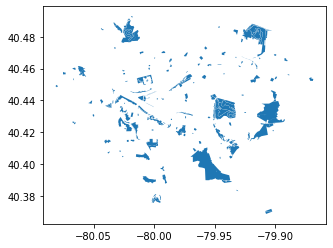

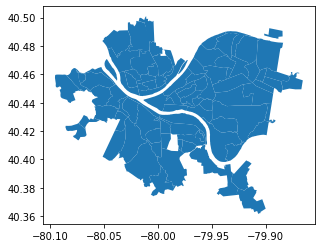

In [167]:
park_map = geopandas.read_file("Parks Shape/PGHWebParks.shp")

#park_map.plot()
for index, row in park_map.iterrows():
    if row['acreage'] < 0.85:
        park_map.drop(index, inplace = True)
park_map.plot()
neighborhoods_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods_map.plot()
neighborhood_df = pd.DataFrame(neighborhoods_map['hood'])


Combining park and neighborhood data and then display how many parks in each neighborhood.

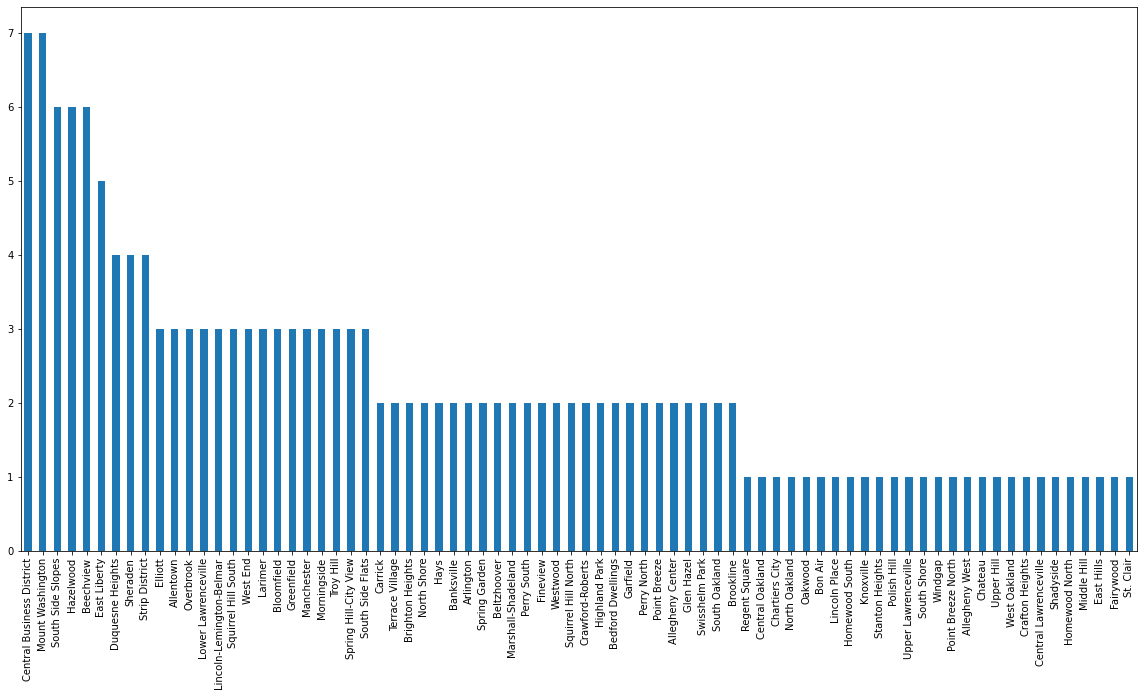

In [168]:
#park_map.head()
#neighborhoods_map.head()
neighborhood_parks = geopandas.sjoin(park_map, neighborhoods_map, how = "inner", op = 'intersects')
file = pd.DataFrame(neighborhood_parks)
#pd.set_option('display.max_columns', None)
#print(neighborhood_parks['hood'].value_counts())
neighborhood_parks['hood'].value_counts().plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))

#neighborhood_parks.plot()

## Steps
    
    

Steps to cleaning steps data
1. Any empty data row is initialized to zero to prevent any errors
2. Any data with length equal to zero initialize to 1 to prevent divide by zero
3. Remove any data with less than 20 steps, too small
4. Remove any data where the ration between steps and length are too extream (removes super steep   stairs & steps that are not steep enough)

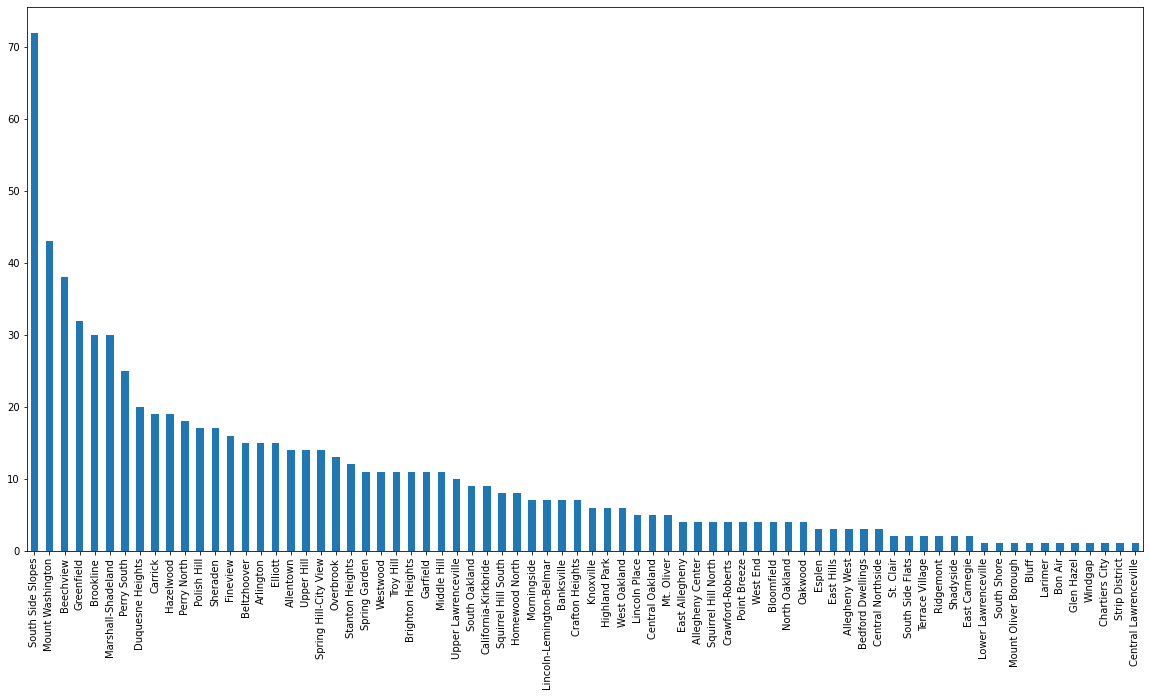

In [175]:
stepData = pd.read_csv('StepsDataSet.csv')

for index, row in neighborhood_df.iterrows():
    try:
        stepData[row]
    except:
        stepData[row] = 0
for index, row in stepData.iterrows():
    
    if row['length'] == 0:
        row['length'] = 1
       
    if pd.isnull(row['number_of_steps']):
        stepData.drop(index, inplace = True)
       
        
    elif row['number_of_steps'] < 20:
        #tepData.drop(index, inplace = True)
        stepData['number_of_rows'] = 0

    
    elif  (row['number_of_steps'] / row['length']) < 0.15:
        #tepData.drop(index, inplace = True, axis = 0)
        stepData['number_of_rows'] = 0
        
    elif  (row['number_of_steps'] / row['length']) > 0.85:
        #tepData.drop(index, inplace = True, axis = 0)
        stepData['number_of_rows'] = 0

step_series = stepData['neighborhood'].value_counts()
step_series.plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))



## We Decided to look at slope throught the entierty of the Pittsburgh Neighbourhoods. The dataset we found was only available in the shape format, so we made it work the best we could. 

In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

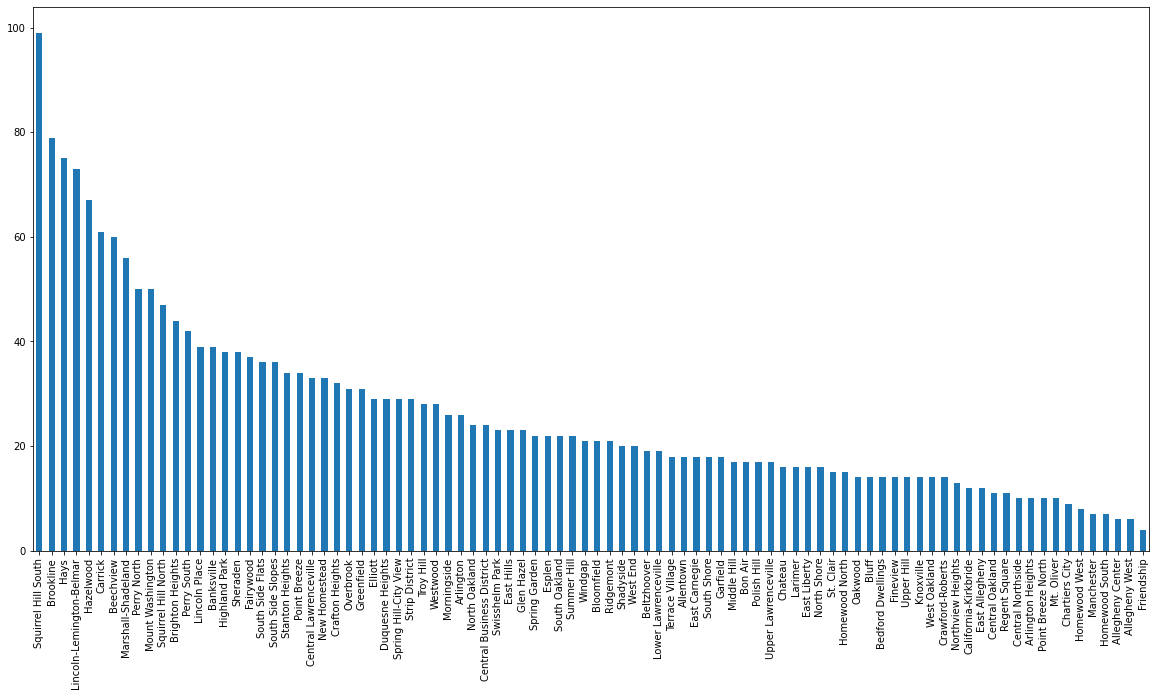

In [170]:
neighborhoods = geopandas.read_file("ShapeFiles/fec820c6-5238-49a5-a8d6-d064cf5b582f2020328-1-xkwj6i.ci16.shp") # read in the shapefile

for index, row in neighborhoods.iterrows():
    if row['Shape__A_1'] < 6500:
        neighborhoods.drop(index, inplace = True)

#print(neighborhoods.head())
#neighborhoods.plot(figsize=(15, 10))
neighborhoods_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
slope_neighborhood = geopandas.sjoin(neighborhoods, neighborhoods_map, how = "inner", op = 'intersects')
#slope_neighborhood.plot(figsize=(15, 10))
slope_neighborhood['hood'].value_counts().plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))

### In order to incooporate the data into our Final decision, we merged datasets and incoorporated slope, steps and parks. 

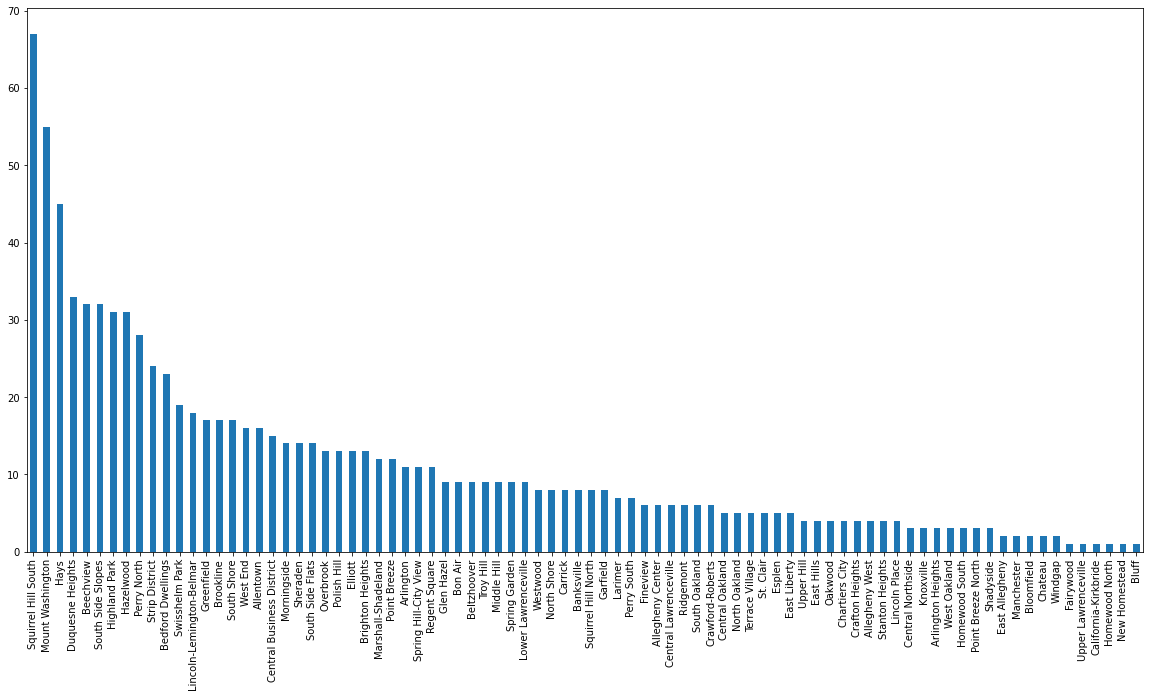

In [173]:
park_slope = geopandas.sjoin(neighborhoods, park_map, how = "inner", op = 'intersects')
#park_slope.drop('index_left', axis=1, inplace=True)
park_slope.drop('index_right', axis=1, inplace=True)
park_slope = geopandas.sjoin(park_slope, neighborhoods_map, how = "inner", op = 'intersects')
#print(park_slope.head())
ps_series = park_slope['hood'].value_counts()
ps_series.plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))


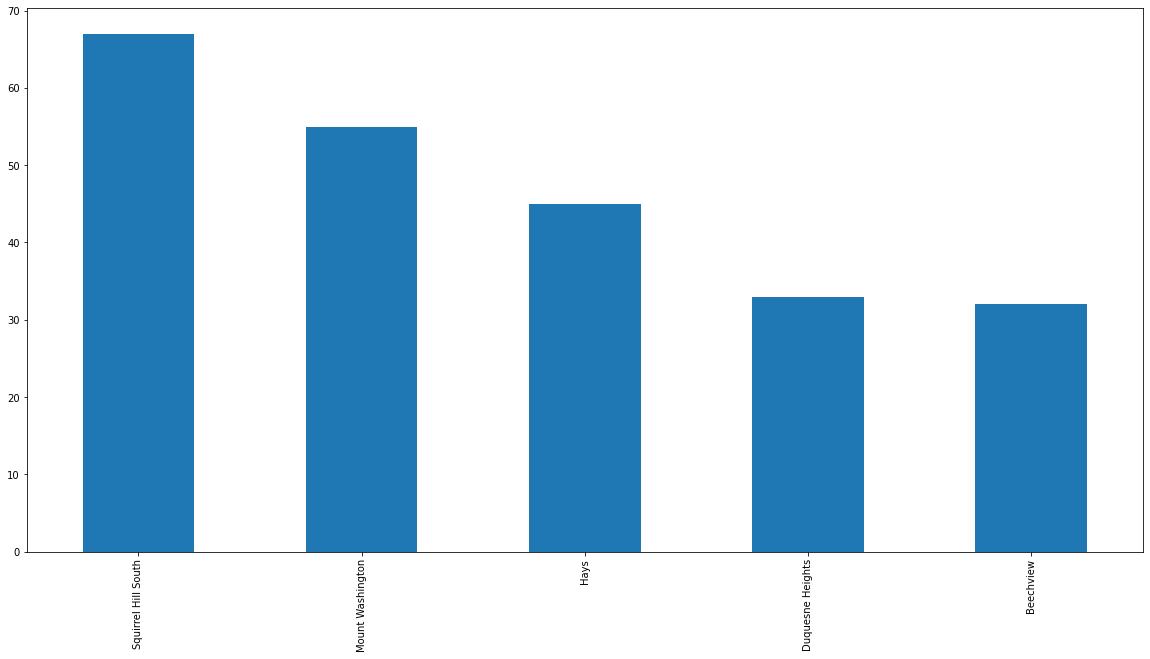

In [132]:
ps_series.head().plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))

## Normalize

We used a base value of 100. Any neighborhoods that were missing from a dataset was given a score of zero. we then weighted the value of the parks/slope data by 0.85 and the steps data by 0.15

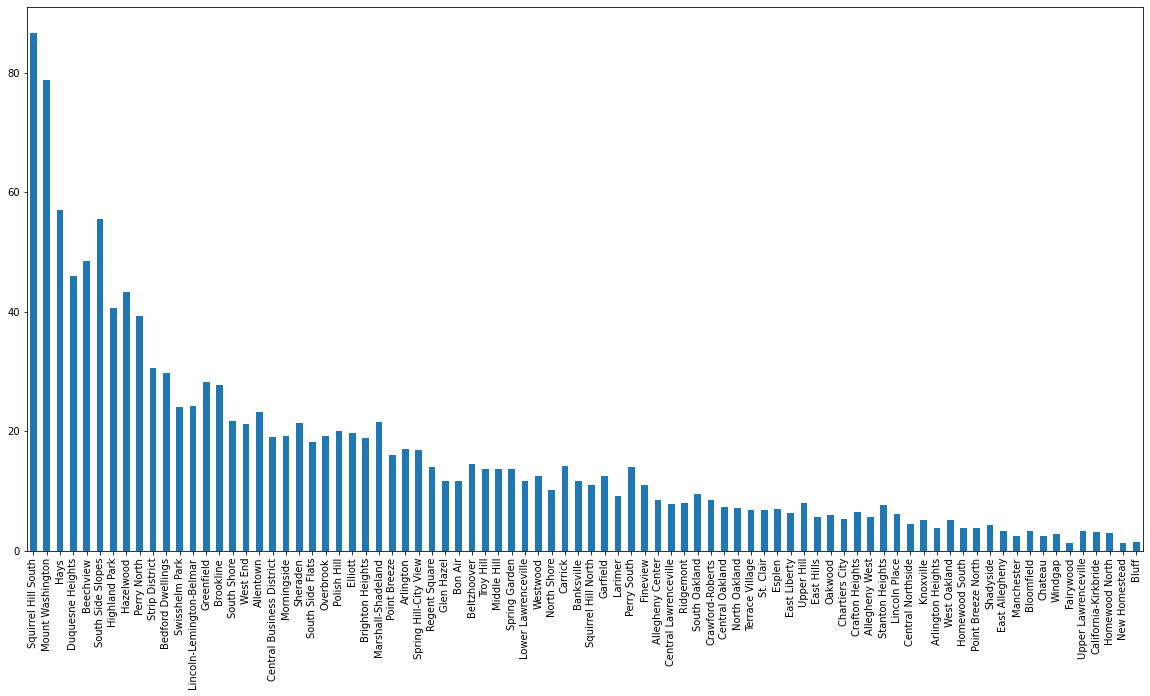

In [176]:
#print(step_series)
#print(ps_series.max())
step_multy = 100 / step_series.max() 
ps_multy = 100 / ps_series.max() 
step_weight = 0.15
ps_weight = 0.85
step_series['Hays'] = 0
step_series['Swisshelm Park'] = 0
step_series['Central Business District'] = 0

for index, value in step_series.items():
    step_series[index] = value * step_multy * step_weight
for index, value in ps_series.items():
    ps_series[index] = value * ps_multy * ps_weight

for index, value in ps_series.items():
    try:
        ps_series[index] = value + step_series[index]
    except:
        ps_series[index] = value

ps_series.sort_values(ascending = False)
ps_series.plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))

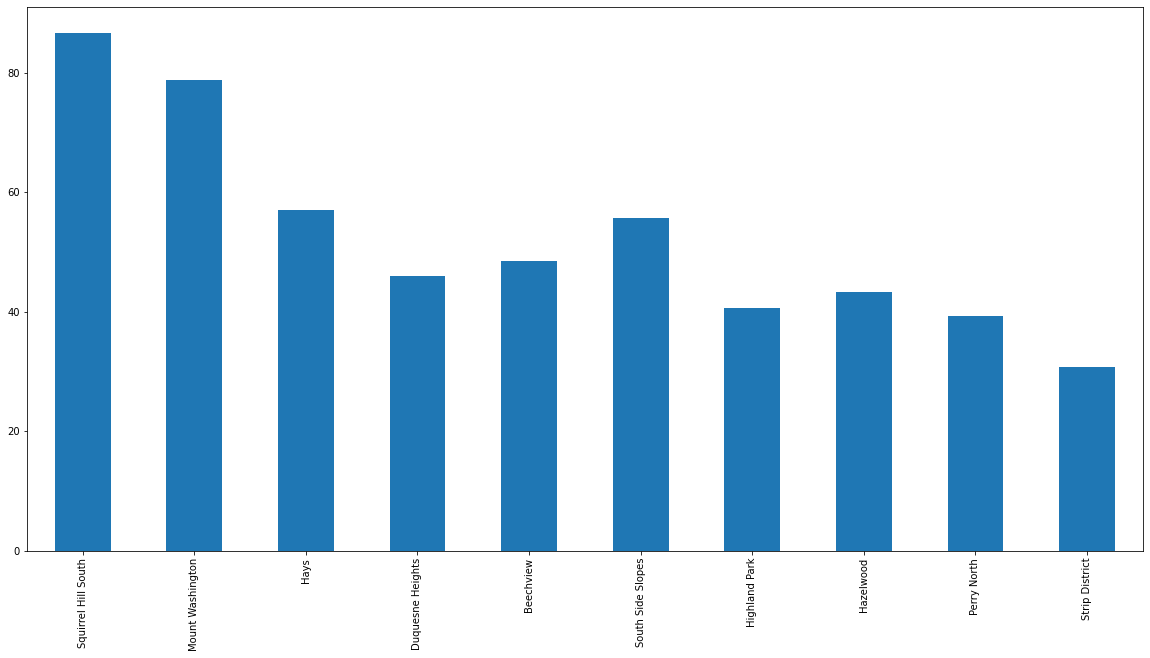

In [177]:
ps_series.head(10).plot.bar(x = 'NeighborHoods', y = 'Count', figsize = (20,10))

# Conclusion

The clear winner is Squirrel Hill South. It has the highest score and is the only one with a score higher than 0.8. When googling best places to sled in Pittsburgh many places appear in this neighborhood. both Schenely Park and Frick Park are mostly in this neighborhood. Nine out of our top ten results are places that have moderate to large parks and are in hilly areas. The only place that is a bit confusing is the Strip District. It is in our final spot but looking at our total data, it still have quite a large score compared to the others.

# Individual Final Thoughts

### Aimon
    I believe that Squirrel Hill South and Mount Washington are the best neighborhoods for sleding. Squirrel Hill South is is probably the best if you were planning on going somewhere to sled as it has the majority of Schenley Park as well as the majority of Frick Park. When googling best places to sled in Pittsburgh, several spots come up in Schenely Park and Frick Park. This includes a hill called Sled Hill in Frick Park. Mount Washington is the neighborhood located across the river from Heiz Field. Initially it seems like a bad blace to go sledding as there is a highway as well as a very steep hill that is full of trees. However, in the residential areas there are plenty of hills and areas one could spontaneously go sledding. There are also a few parks in Mount Washington that could be used to sled as well. Most of the top ten data points are similar to mount washington where they have a park or two and are in hilly areas of Pittsburgh. Personally I believe Mount Washignton would be the better neighborhood as I think sledding is best when it's 10pm and you randomly realize there is enough snow to go sledding.

### Rohan
Before combining the park and the slope data, I already had a good sense that squirrel hill south was going to win the title of best neighborhood for sledding because of the margin of which it was beating the other neighborhoods. However, after the merging was complete, I got a better sense of what other neighborhoods were actual options for sledding. As Aimon noted in his conclusion, it was really cool that our results seemed to match up with a simple google search of the best places to go sledding and I believe that that is something we can be proud of. Even though we had a small flaw in our slope data, I still believe that the results would have been similar and am satisfied with our findings.